In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
from functions import get_phasor, get_fft_data, plot_average_fft, animate_phasor, exponential_fourier_series

If you multiply a complex number by its conjugate, it zeros out the imaginary part, leaving you with only the real part.
You can accomplish the same thing by squaring the magnitude of the complex number.

In [15]:
z = np.complex128(27/74 +  1j * (51/74))
z_conj = np.conj(z)
assert math.isclose(np.real(z * z_conj), np.abs(z)**2, rel_tol=1e-9, abs_tol=0.0)
np.real(z * z_conj), np.abs(z)**2

(np.float64(0.608108108108108), np.float64(0.6081081081081079))

In [16]:
z1 = np.complex128(-32 + 8j) / np.complex128(5 + 3j)
z2 = np.complex128(-4  + 4j)

assert math.isclose(z1.real, z2.real, rel_tol=1e-9)
assert math.isclose(z1.imag, z2.imag, rel_tol=1e-9)
z1, z2

(np.complex128(-4+4j), np.complex128(-4+4j))

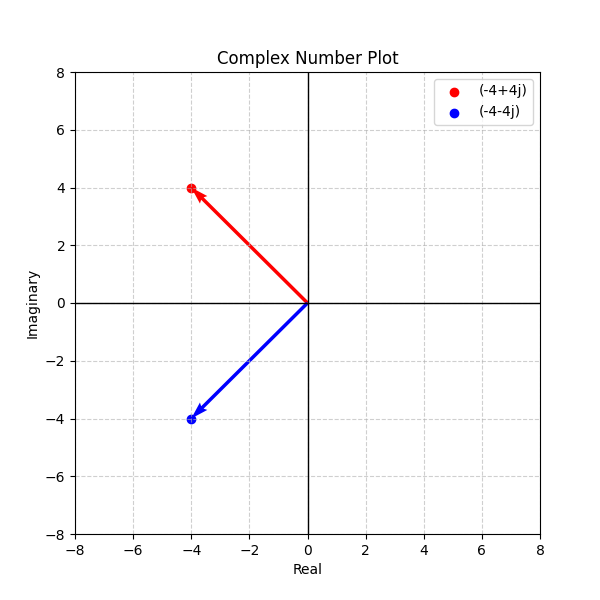

In [17]:
# Define a complex number
z = np.complex128(-4  + 4j)
z_conj = np.conj(z)

assert math.isclose(np.real(z * z_conj), np.abs(z)**2, rel_tol=1e-9, abs_tol=0.0)

# Plot
plt.figure(figsize=(6,6))
plt.axhline(0, color='black', linewidth=1)  # Real axis
plt.axvline(0, color='black', linewidth=1)  # Imaginary axis
plt.grid(True, linestyle='--', alpha=0.6)

# Plot the complex number
plt.scatter(z.real, z.imag, color='red', label=f'{z}')
plt.scatter(z_conj.real, z_conj.imag, color='blue', label=f'{z_conj}')
plt.quiver(0, 0, z.real, z.imag, angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(0, 0, z_conj.real, z_conj.imag, angles='xy', scale_units='xy', scale=1, color='blue')


# Labels
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Number Plot')
plt.legend()

x_max = np.abs(np.real(z)) * 2
x_min = x_max * -1
y_max = np.abs(np.imag(z)) * 2
y_min = y_max * -1

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

In [18]:
# Parameters
amplitude = 5           # Amplitude of the sine wave
frequency = 10          # Frequency in Hz
sampling_rate = 1024    # Sampling rate in Hz
duration = 1            # Duration in seconds

# Time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

initial_phase = 2 * np.pi # In Radians

radian_frequency = 2 * np.pi * frequency

period = 2 * np.pi / radian_frequency

phase = (radian_frequency * t) + initial_phase

# Sine wave
sinusoid = amplitude * np.cos(phase)

# Phasor: complex exponential representation
phasor = amplitude * np.exp(1j * phase)

print(f'Radian Frequency: {radian_frequency}')
print(f'Period: {period}')
print(f'Initial Phase: {initial_phase}')

Radian Frequency: 62.83185307179586
Period: 0.1
Initial Phase: 6.283185307179586


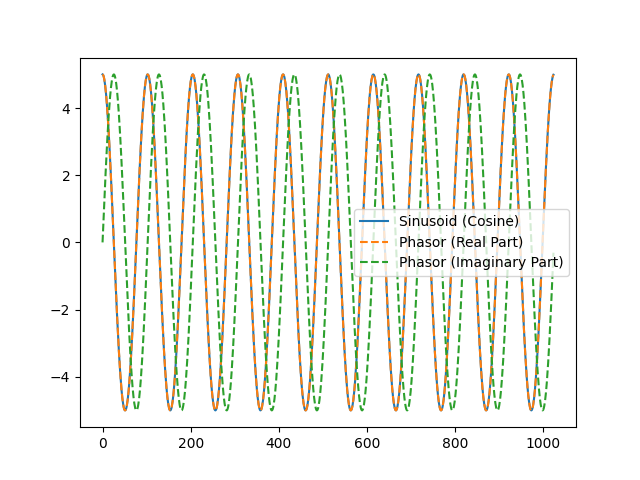

In [19]:
plt.figure()
plt.plot(sinusoid, label='Sinusoid (Cosine)')
plt.plot(phasor.real, label='Phasor (Real Part)', linestyle='--')
plt.plot(phasor.imag, label='Phasor (Imaginary Part)', linestyle='--')
plt.legend()
plt.show()

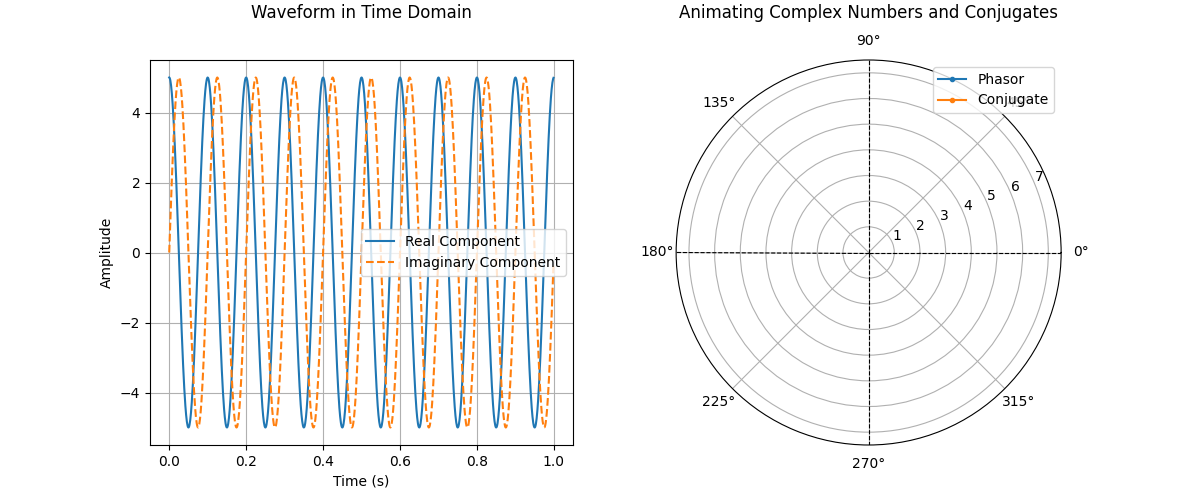

In [20]:
%matplotlib widget
animation = animate_phasor(phasor, amplitude, duration)

Use the get_phasor function and compare it to the manually built phasor

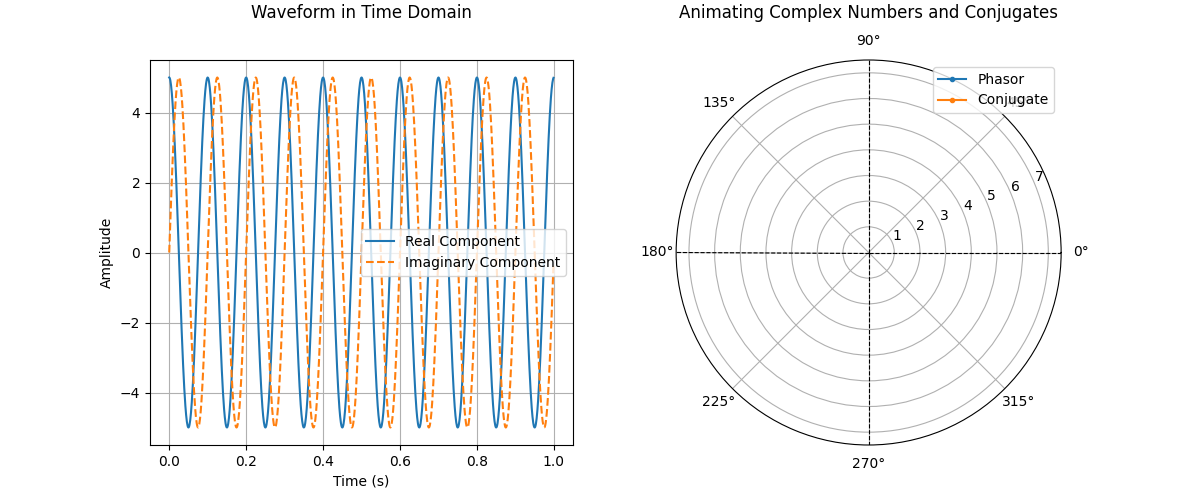

In [21]:
phasor_compare = get_phasor(amplitude=5, frequency=10, duration=1, fs=1024, phase_angle_degrees=0)
assert np.allclose(phasor, phasor_compare, rtol=1e-9)
%matplotlib widget
animation = animate_phasor(phasor_compare, amplitude, duration)

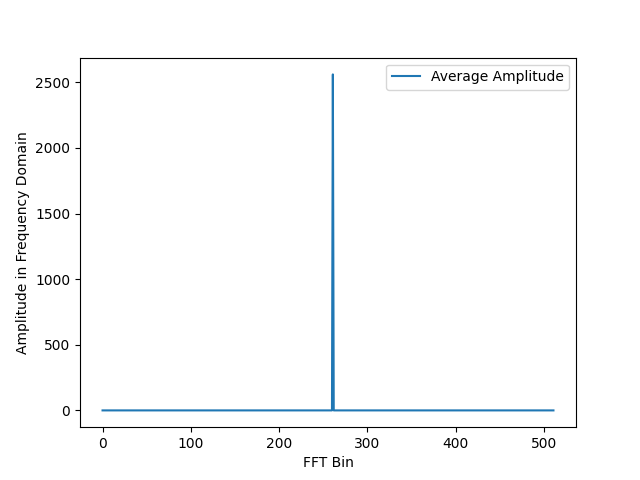

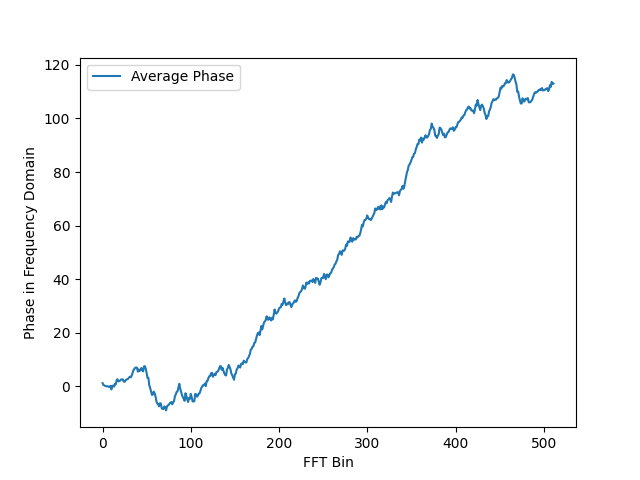

In [22]:
nfft=512
amplitude_frequency_domain = np.abs(get_fft_data(phasor, nfft))
phase_frequency_domain = np.unwrap(np.angle(get_fft_data(phasor, nfft)))
plot_average_fft(np.fft.fftshift(amplitude_frequency_domain), 'Amplitude')
plot_average_fft(phase_frequency_domain, 'Phase')

Exercise 2.1-1

Construct the one-sided and two-sided spectrum of v(t) = -3 - 4 * sin 30 pi * t

In [23]:
duration=3
sampling_rate=1024

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# DC - No Frequency
amp_dc = -3
phase_angle_dc = np.radians(180)
dc_real = np.full_like(t, amp_dc * np.cos(phase_angle_dc))
dc_phasor = amp_dc * np.exp(1j * phase_angle_dc)


# 30pi component
amp_30pi = -4
angular_freq_30pi = 30 * np.pi
phase_angle_30pi = np.radians(90)
phase_30pi = angular_freq_30pi * t + phase_angle_30pi

hz_30pi = angular_freq_30pi / (2 * np.pi)
period_30pi = 1 / hz_30pi

real_30pi = amp_30pi * np.cos(phase_30pi)
phasor_30pi = amp_30pi * np.exp(1j * phase_30pi) # 30pi component as a complex number


#Combine the components
combined = dc_real + real_30pi
combined_phasor = dc_phasor + phasor_30pi

print(f'period_30pi: {period_30pi}')
print(f'hz_30pi: {hz_30pi}')

tolerance = 1e-15  # Define a tolerance for numerical errors
is_close = np.allclose(combined, np.real(combined_phasor), atol=tolerance)
print(f'is_close: {is_close}')

period_30pi: 0.06666666666666668
hz_30pi: 14.999999999999998
is_close: True


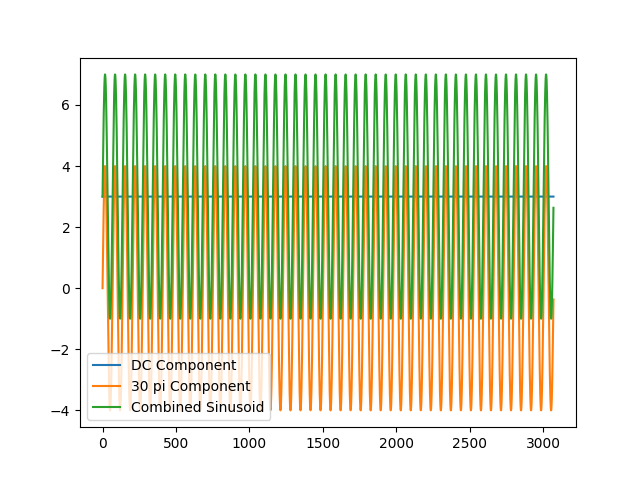

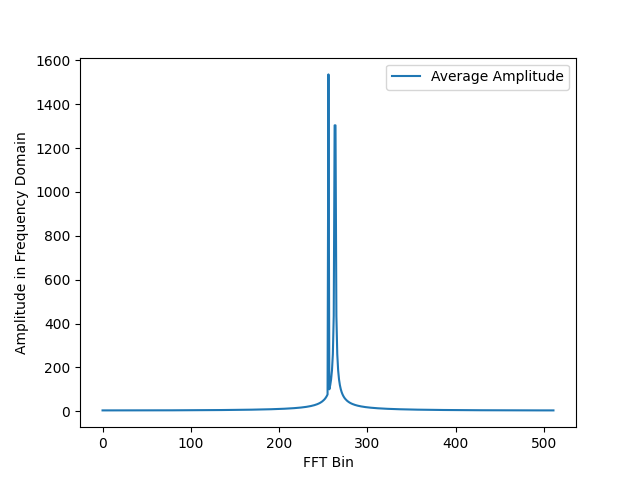

In [24]:
plt.figure()
plt.plot(dc_real, label='DC Component')
plt.plot(real_30pi, label='30 pi Component')
plt.plot(combined_phasor, label='Combined Sinusoid')
plt.legend()
plt.show()

nfft = 512
amplitude_frequency_domain = np.abs(get_fft_data(combined_phasor, nfft))
plot_average_fft(np.fft.fftshift(amplitude_frequency_domain), 'Amplitude')

Plot the one-sided spectrum

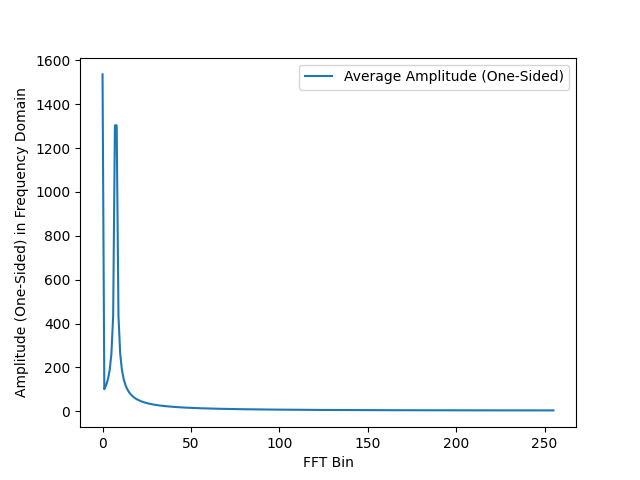

In [25]:
one_sided = amplitude_frequency_domain[:, :nfft // 2]  # Take first half (for each section)
plot_average_fft(one_sided, 'Amplitude (One-Sided)')